# Numpy.Random - A journey

## The Purpose of the Package

Random numbers are used for a variety of purposes. There are purposes known to everyone such as games and gambling, as well as other, less known purpsed like encryption, simulations, and selecting random samples from larger datasets.

There are two types of random number generator: (1) True Random Number generators, and (2) Psuedo Random Number generators. 
The Numpy.Random package is a Pseudo random number generator. Pseudo Random number generators differ from True random number generators in that the numbers are not really random. They are based on algorithm (the Mersenne Twister in Python's case) that selects numbers that seem random, but in reality can be reproduced or predicted if you manage to see what is happening "under the hood". This is what makes pseudo random number unreliable for security purposes such as encryption or generating passwords. True random number generators are impossible to predict (or close enough). One example of a True Random Number generator would be rolling a dice and seeing what you get. This would be pretty labourious for commercial application, so people have created several methods for getting true random numbers such as RANDOM.ORG which uses atmospheric noise or others that use quantum phenoena. As true random number generators can only produce a limited number of random numbers per second, they are often used to create the seed for a faster pseudorandom number generator. Python does have a seperate package for generating cryptographically strong random numbers, which is called Secrets.

## Simple Random Data and Permutations

### Simple Random Data

### What is the user of the Simple Random Data function

#### 1. rand

Creates random numbers in a uniform distribution, meaning that the values are completely random. You can also specify the shape of the numbers in multiple dimensions. Entering one arguement will create a line. All numbers generate will be between 0 and 1.

[0.62480898 0.48633532 0.18804632 0.8886257  0.88261072 0.76452971
 0.8280623  0.48135631 0.00431127 0.27315982]


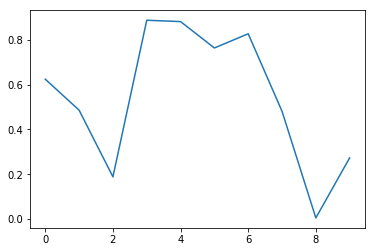

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

list = np.random.rand(10)
print(list)
plt.plot(list)
plt.show()
    

It can also be used to create a random number

In [14]:
np.random.rand()

0.2714430597045333

#### randn

This function produces random number is a normal distribution as a opposed to a uniform distribution. It can take either an integer or shape as it's input. A normal distribution results in a "bell curve" when charted. This mean that higher percentate of the floats produced by the function will be clustered around the mean. 68.26% will be one standard deviation above or below the mean. 95.44% will be two standard deviation away from the mean. 99.72% will be 3 standard deviations away from the mean. 

When using *randn* the distribution produced will always have a mean of 0 and variance of 1

C:\Users\Conor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


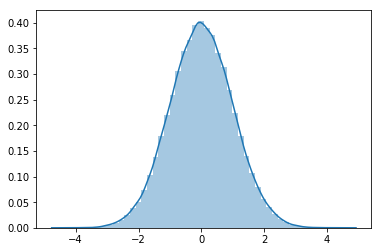

In [21]:
randnarray = np.random.randn(100000,1)

sns.distplot(randnarray)

#### randint

This function produces random integers in the range that is inputted. You can also specify the amount of numbers to be produced. If no "size" is specified the function will just produce one result. The upper range must always be one higher than the highest number you want to select from. For example, if 10 is the highest number you want, then you must enter 11 in the function parameters.

In [98]:
# Picking a number between 1 and 10
np.random.randint(0, 11)

5

In [90]:
# Pick a number between -1 and -10
np.random.randint(-10, 0)

-5

In [99]:
# 10 random numbers from between 100 and 200.
np.random.randint(100, 201)

194

It is also possible to produce different shapes by entering a tuple as the "size" parameter. 

In [111]:
np.random.randint(11, size=(3,2,5))

array([[[ 5,  4, 10,  7,  4],
        [ 7,  6,  8,  2,  7]],

       [[10,  6,  8,  1,  4],
        [10,  7,  6,  1,  9]],

       [[ 1,  4, 10,  0,  3],
        [ 5, 10,  0,  0,  7]]])

Finally, you can also specify the data type (dtype). 

In [120]:
np.random.randint(1, dtype="int")

0

Floats and complex numbers are not supported, boolean outputs are as long as you limit the "high" value to 2.

In [130]:
np.random.randint(2, dtype="bool")

False

#### Use: Random phone number generator or dice rolls

#### random_integers

This is a deprecated function that has been replaced by *randint* which is discussed above.

#### random_sample, random, ranf, sample

These four functions all return a random float or array of floats depending on the parameters used. 

In [131]:
# single random float
np.random.random_sample()

0.04215465253373252

In [137]:
# array of floats
np.random.random((5,2))

array([[0.32861271, 0.95775102],
       [0.63389128, 0.03640718],
       [0.42962809, 0.7718992 ],
       [0.24100125, 0.58390149],
       [0.26325588, 0.4048162 ]])

#### choice

This function selects random options from a given one dimensional array. The options can be ints, floats, or an array like object such a list or tuple.

For example, you could use this to randomly select a city in Ireland.

In [143]:
# Where will I go for the long weekend?

cities = ["Limerick", "Galway", "Cork", "Dublin", "Waterford", "Kilkenny"]
print("You're going to " + np.random.choice(cities) + "!!!!")

You're going to Dublin!!!!


As with all the previous random functions, you can also specify the shape of the data you want to select. You can also choose to prevent the same result being returned twice using the "replacement" parameter.

In [150]:
# Randomly rank the cities in two tiers - without using replacement you can end up with the same city in both tiers.

np.random.choice(cities, size=(2,3))

array([['Cork', 'Dublin', 'Waterford'],
       ['Kilkenny', 'Dublin', 'Cork']], dtype='<U9')

In [151]:
# Randomly rank the cities in two tiers - with replacement = false you will get two sets of unique values

np.random.choice(cities, size=(2,3), replace=False)

array([['Kilkenny', 'Cork', 'Waterford'],
       ['Galway', 'Limerick', 'Dublin']], dtype='<U9')

Finally, you can also weight the probability of a certain option being selected. The sum of the probabilites must be 1.

In [155]:
# What is the best city in Ireland? 
print("Our totally unbiased computer has selected " + np.random.choice(cities, p=[0.95, 0.01, 0.01, 0.01, 0.01, 0.01])
          + " as the best city in Ireland.")

Our totally unbiased computer has selected Limerick as the best city in Ireland


#### bytes

This function generates a string of bytes of a specified length.

In [163]:
np.random.bytes(20)

b'\x85\xce9k\xe1\x07%m\xb9\xd1\xdbWs\\\xaf\xaa\xadW\xe1b'

Bar some creepy ouija board scenario, the bytes returned will be nonsense, but we can attempt to decode and view the characters using the "chardet" package and the "decode" method. However, sometimes the bytes won't have encoding and we won't be able to translate.

In [290]:
"""Detect what the encoding used is. https://stackoverflow.com/questions/15918314/how-to-detect-string-byte-encoding"""
import chardet

bytes_str = np.random.bytes(10)
print("Your string of bytes:", bytes_str)
print(" ")
detect_encoding = chardet.detect(bytes_str)["encoding"]
if detect_encoding is None:
    print("Bytes not encoded - can't translate")
else:
    print("Encoding type detected =", detect_encoding)
    print(" ")
    print("Decoded bytes =", bytes_str.decode(detect_encoding))


Your string of bytes: b'_\xd44\x9b|\xd1\x1e\xa5\xcd\x01'
 
Encoding type detected = Windows-1252
 
Decoded bytes = _Ô4›|Ñ¥Í


In [339]:
# bytes to integer
bytes2 = np.random.bytes(1)
int.from_bytes(bytes2, byteorder="big")

210

### Permutations

#### Shuffle

The shuffle function reorganises an array of data. See example below.

In [358]:
shuff_ints = np.random.randint(100, size=10)
print(shuff_ints)
np.random.shuffle(shuff_ints)
print(shuff_ints)

[26 39 81 52  1 82 42 35 95 81]
[39 52 95 42 81  1 35 82 81 26]


Most people would be familiar with the concept of shuffling from playing cards. It ensures fairnees by breaking up the order of cards from their suits and values / heirarchy. 

An online blackjack game would be very easy to predict if we new the order the cards were going to be dealt from the deck. 

In [365]:
# create a deck of cards - https://stackoverflow.com/questions/41970795/what-is-the-best-way-to-create-a-deck-of-cards
values = ['2','3','4','5','6','7','8','9','10','Jack','Queen','King','Ace']
suites = ['Hearts', 'Clubs', 'Diamonds', 'Spades']
deck = [v + ' of ' + s for s in suites for v in values]
print(deck)

['2 of Hearts', '3 of Hearts', '4 of Hearts', '5 of Hearts', '6 of Hearts', '7 of Hearts', '8 of Hearts', '9 of Hearts', '10 of Hearts', 'Jack of Hearts', 'Queen of Hearts', 'King of Hearts', 'Ace of Hearts', '2 of Clubs', '3 of Clubs', '4 of Clubs', '5 of Clubs', '6 of Clubs', '7 of Clubs', '8 of Clubs', '9 of Clubs', '10 of Clubs', 'Jack of Clubs', 'Queen of Clubs', 'King of Clubs', 'Ace of Clubs', '2 of Diamonds', '3 of Diamonds', '4 of Diamonds', '5 of Diamonds', '6 of Diamonds', '7 of Diamonds', '8 of Diamonds', '9 of Diamonds', '10 of Diamonds', 'Jack of Diamonds', 'Queen of Diamonds', 'King of Diamonds', 'Ace of Diamonds', '2 of Spades', '3 of Spades', '4 of Spades', '5 of Spades', '6 of Spades', '7 of Spades', '8 of Spades', '9 of Spades', '10 of Spades', 'Jack of Spades', 'Queen of Spades', 'King of Spades', 'Ace of Spades']


In [367]:
#shuffle our deck
np.random.shuffle(deck)
print(deck)

['Queen of Diamonds', '6 of Diamonds', '3 of Diamonds', '6 of Spades', 'Ace of Diamonds', '7 of Spades', 'King of Clubs', 'King of Diamonds', 'Jack of Clubs', '10 of Spades', '10 of Hearts', '7 of Hearts', '3 of Hearts', '2 of Hearts', 'Jack of Spades', 'Ace of Spades', '3 of Spades', '5 of Diamonds', '6 of Clubs', '8 of Hearts', '4 of Diamonds', '2 of Diamonds', '4 of Spades', '6 of Hearts', '8 of Spades', 'Ace of Hearts', '7 of Clubs', '2 of Clubs', 'Queen of Spades', 'Jack of Hearts', '9 of Hearts', '3 of Clubs', '4 of Hearts', '7 of Diamonds', '4 of Clubs', '8 of Clubs', 'Queen of Clubs', '10 of Clubs', '9 of Diamonds', '5 of Clubs', 'Jack of Diamonds', 'Queen of Hearts', 'King of Spades', '9 of Clubs', '2 of Spades', '9 of Spades', 'King of Hearts', '10 of Diamonds', '5 of Spades', 'Ace of Clubs', '5 of Hearts', '8 of Diamonds']


One of the most important uses for shuffling in data science is for training in machine learning. If data is sorted by class / target ordered in groups with simlar characteristics (like a deck of cards), suffling data ensures that the subset of the data you us for training is representative of the entrie dataset and does not build biases into the model.

A good example of this is our old friend Fisher's Iris dataset. The data comes sorted into the three classes of Iris. If we were to take the first 50 values as our training set for a K Nearest Neighbours algorithm, it would not be able to make accurate predictions for two of the spicies of Iris in the dataset. See example below.


In [374]:
import sklearn as skl
url = 'https://raw.githubusercontent.com/ConorHogan/Programming_Scripting_Projects/master/Iris_Data.csv'
irisdf = pd.read_csv(url, header=None) 
irisdf.columns = ["S_Length","S_Width","P_Length","P_Width","Species"]
irisdf.columns.name = "Attributes"
irisdf.set_index("Species", inplace=True)



#### Permutation

The Permutation function randomly permutes a sequence of integers or elements from an array.

In [372]:
# Permute numbers from 0 to 100.
np.random.permutation(100)

array([21,  2,  0, 90, 16, 44, 75, 70, 28, 81, 13, 17,  3, 79, 76, 34, 57,
       98, 19, 67, 64, 82, 54, 24, 49, 73, 96, 68, 32, 39, 41, 93, 60, 38,
       59, 74, 87, 80, 92, 14,  5,  1, 46, 61, 55, 56, 97, 29, 20, 84, 71,
       47,  6, 85, 31, 58,  9, 43, 52, 48, 27, 51, 50, 26, 42, 63, 10,  7,
       15, 99, 94, 95, 88, 12, 37, 62, 11, 23, 36, 45, 65, 18, 33, 22, 77,
       83, 66,  8, 91, 40, 78, 53, 25, 86, 69, 72, 89,  4, 35, 30])

In [373]:
# Permute elements from an array
np.random.permutation(cities)

array(['Galway', 'Cork', 'Waterford', 'Dublin', 'Kilkenny', 'Limerick'],
      dtype='<U9')

Permuting in a multi-dimentional only shuffles data along it's first index. 

In [378]:
#Using the Iris dataset
irisarray = irisdf.reset_index().values # convert pandas dataframe to array.
print(irisarray)

[['Iris-setosa' 5.1 3.5 1.4 0.2]
 ['Iris-setosa' 4.9 3.0 1.4 0.2]
 ['Iris-setosa' 4.7 3.2 1.3 0.2]
 ['Iris-setosa' 4.6 3.1 1.5 0.2]
 ['Iris-setosa' 5.0 3.6 1.4 0.2]
 ['Iris-setosa' 5.4 3.9 1.7 0.4]
 ['Iris-setosa' 4.6 3.4 1.4 0.3]
 ['Iris-setosa' 5.0 3.4 1.5 0.2]
 ['Iris-setosa' 4.4 2.9 1.4 0.2]
 ['Iris-setosa' 4.9 3.1 1.5 0.1]
 ['Iris-setosa' 5.4 3.7 1.5 0.2]
 ['Iris-setosa' 4.8 3.4 1.6 0.2]
 ['Iris-setosa' 4.8 3.0 1.4 0.1]
 ['Iris-setosa' 4.3 3.0 1.1 0.1]
 ['Iris-setosa' 5.8 4.0 1.2 0.2]
 ['Iris-setosa' 5.7 4.4 1.5 0.4]
 ['Iris-setosa' 5.4 3.9 1.3 0.4]
 ['Iris-setosa' 5.1 3.5 1.4 0.3]
 ['Iris-setosa' 5.7 3.8 1.7 0.3]
 ['Iris-setosa' 5.1 3.8 1.5 0.3]
 ['Iris-setosa' 5.4 3.4 1.7 0.2]
 ['Iris-setosa' 5.1 3.7 1.5 0.4]
 ['Iris-setosa' 4.6 3.6 1.0 0.2]
 ['Iris-setosa' 5.1 3.3 1.7 0.5]
 ['Iris-setosa' 4.8 3.4 1.9 0.2]
 ['Iris-setosa' 5.0 3.0 1.6 0.2]
 ['Iris-setosa' 5.0 3.4 1.6 0.4]
 ['Iris-setosa' 5.2 3.5 1.5 0.2]
 ['Iris-setosa' 5.2 3.4 1.4 0.2]
 ['Iris-setosa' 4.7 3.2 1.6 0.2]
 ['Iris-se

In [379]:
#Suffle
np.random.permutation(irisarray)

array([['Iris-versicolor', 6.1, 2.9, 4.7, 1.4],
       ['Iris-setosa', 5.4, 3.7, 1.5, 0.2],
       ['Iris-versicolor', 5.9, 3.0, 4.2, 1.5],
       ['Iris-virginica', 6.9, 3.2, 5.7, 2.3],
       ['Iris-setosa', 5.5, 4.2, 1.4, 0.2],
       ['Iris-setosa', 4.4, 3.2, 1.3, 0.2],
       ['Iris-virginica', 6.5, 3.0, 5.2, 2.0],
       ['Iris-versicolor', 6.5, 2.8, 4.6, 1.5],
       ['Iris-setosa', 5.0, 3.5, 1.6, 0.6],
       ['Iris-setosa', 5.0, 3.5, 1.3, 0.3],
       ['Iris-setosa', 4.6, 3.4, 1.4, 0.3],
       ['Iris-virginica', 6.1, 2.6, 5.6, 1.4],
       ['Iris-versicolor', 6.1, 2.8, 4.7, 1.2],
       ['Iris-setosa', 5.4, 3.4, 1.5, 0.4],
       ['Iris-virginica', 7.7, 2.8, 6.7, 2.0],
       ['Iris-setosa', 4.9, 3.1, 1.5, 0.1],
       ['Iris-virginica', 7.2, 3.6, 6.1, 2.5],
       ['Iris-virginica', 7.2, 3.2, 6.0, 1.8],
       ['Iris-setosa', 4.7, 3.2, 1.3, 0.2],
       ['Iris-virginica', 7.7, 3.8, 6.7, 2.2],
       ['Iris-setosa', 4.4, 2.9, 1.4, 0.2],
       ['Iris-setosa', 4.8, 3.0, 1.4, 0

The main difference between using the Shuffle and Permutation functions on an array are that Shuffle changes data in the array it is used on whereas Permutation will create a shuffled copy of the array.

In [383]:
# Printing prints irisarray shows it hasn't been permanently modified
#print(irisarray)
shufflediris = np.random.shuffle(irisarray)
print(shufflediris)

None


## Distribution Functions

## Seeds and Pseudorandom Numbers